In [316]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [317]:
df = pd.read_csv('Salary Data.csv')

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


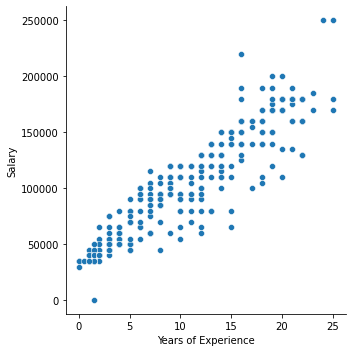

In [318]:
sns.relplot(x='Years of Experience',y='Salary',kind='scatter',data=df)

In [319]:
x = df['Years of Experience'].dropna()

In [320]:
y=df['Salary'].dropna()


In [321]:
x.shape,y.shape

((373,), (373,))

In [322]:

from sklearn.preprocessing import OrdinalEncoder
x_train,x_test,y_train,y_test = train_test_split( x,y,test_size=0.3,random_state=0)
x_test.shape

(112,)

In [323]:
class LinearRegression:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m = num / den
        self.b = y_train.mean() - (self.m * X_train.mean())

    def predict(self, X_test):
        Y=self.m * X_test + self.b
        return Y
    def mean_absolute_error(self,y_test, y_pred):
        return np.sum(y_test-y_pred)

    def mean_squared_error(self,y_test,y_pred):
        return np.sum((y_test - y_pred)**2)


In [324]:
lr = LinearRegression()


In [325]:
lr.fit(x_train,y_train)

KeyError: 1

In [326]:
y_pred = lr.predict(x_test)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [327]:
y_pred

array([ 45391.74530215,  45391.74530215,  52273.58212375, 141737.46080464,
        86682.76623179, 141737.46080464,  59155.41894536, 127973.78716142,
        45391.74530215, 176146.64491267,  66037.25576697, 114210.11351821,
       134855.62398303,  79800.92941018, 107328.2766966 ,  59155.41894536,
        52273.58212375,  45391.74530215, 141737.46080464, 169264.80809106,
        86682.76623179,  86682.76623179, 100446.439875  ,  45391.74530215,
       189910.31855588,  45391.74530215,  66037.25576697,  66037.25576697,
       114210.11351821,  52273.58212375,  66037.25576697, 114210.11351821,
       114210.11351821, 134855.62398303,  52273.58212375, 114210.11351821,
        52273.58212375, 107328.2766966 , 100446.439875  , 114210.11351821,
       127973.78716142, 162382.97126945, 141737.46080464, 169264.80809106,
       162382.97126945,  45391.74530215,  72919.09258857, 155501.13444785,
        59155.41894536,  86682.76623179,  93564.60305339,  93564.60305339,
        79800.92941018,  

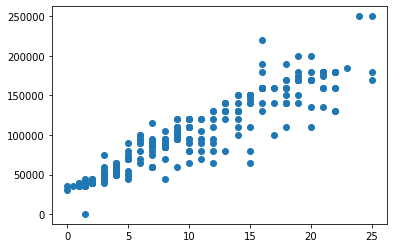

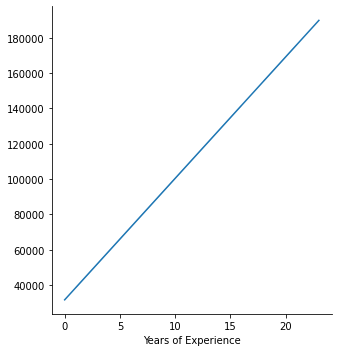

In [328]:
#x_test.shape,y_pred.shape 
plt.scatter(x=x_train,y=y_train)

sns.relplot(x=x_test,y=y_pred,kind='line')
